# Laboratorio DeepLearning - MLP
### Para este laboratorio se utilizo el notebook "03.MLP-L2-OPT" visto en clases.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = load_iris()
X = data.data
y = data.target

In [4]:
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [6]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 1s 20ms/step - loss: 3.7756 - accuracy: 0.3241 - val_loss: 1.5890 - val_accuracy: 0.4167
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 3.6211 - accuracy: 0.3333 - val_loss: 1.4088 - val_accuracy: 0.4167
Epoch 3/50
22/22 [==============================] - 0s 6ms/step - loss: 3.0438 - accuracy: 0.3426 - val_loss: 1.3314 - val_accuracy: 0.4167
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 2.7797 - accuracy: 0.3426 - val_loss: 1.2676 - val_accuracy: 0.4167
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 2.5147 - accuracy: 0.3148 - val_loss: 1.2445 - val_accuracy: 0.4167
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 2.3373 - accuracy: 0.3056 - val_loss: 1.2145 - val_accuracy: 0.4167
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 1.7558 - accuracy: 0.3519 - val_loss: 1.2204 - val_accuracy: 0.4167
Epoch 8/50
22/22 [=

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 42ms/step - loss: 1.2018 - accuracy: 0.5000
Precisión en el conjunto de prueba: 50.00%


In [11]:
model.save('mlp_model_dropout.h5')

In [12]:
from tensorflow.keras.models import load_model
model = load_model('mlp_model_dropout.h5')

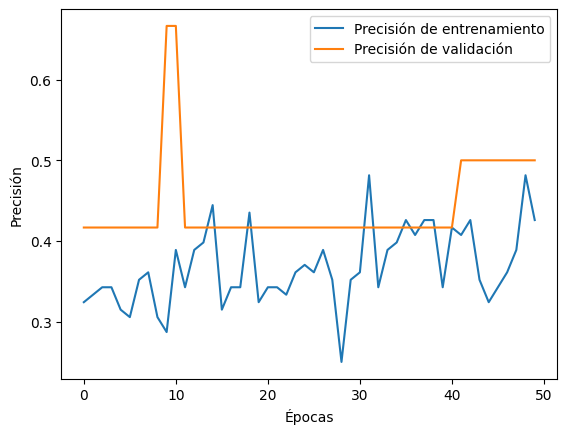

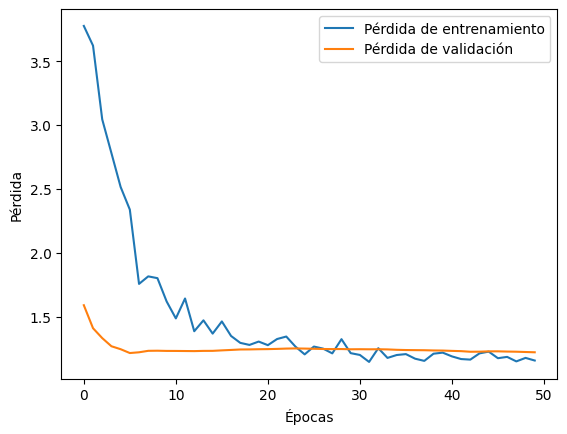

In [13]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Desafios
### Desafío 1: Cambiar la Tasa de Aprendizaje del Optimizador Adam
1. Cambie la tasa de aprendizaje a 0.01:

In [14]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

optimizer = Adam(0.01)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 1s 17ms/step - loss: 1.5953 - accuracy: 0.3704 - val_loss: 1.1892 - val_accuracy: 0.7500
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 1.2478 - accuracy: 0.3426 - val_loss: 1.1533 - val_accuracy: 0.5833
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 1.1642 - accuracy: 0.4352 - val_loss: 1.1342 - val_accuracy: 0.5833
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 1.1003 - accuracy: 0.5000 - val_loss: 1.0771 - val_accuracy: 0.5833
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 1.0291 - accuracy: 0.5370 - val_loss: 0.9697 - val_accuracy: 0.8333
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.9149 - accuracy: 0.5926 - val_loss: 0.9031 - val_accuracy: 0.6667
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.9524 - accuracy: 0.5833 - val_loss: 0.8442 - val_accuracy: 0.5833
Epoch 8/50
22/22 [=

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 45ms/step - loss: 0.5672 - accuracy: 0.6667
Precisión en el conjunto de prueba: 66.67%


In [16]:
model.save('mlp_model_dropout_desafio1_1.h5')

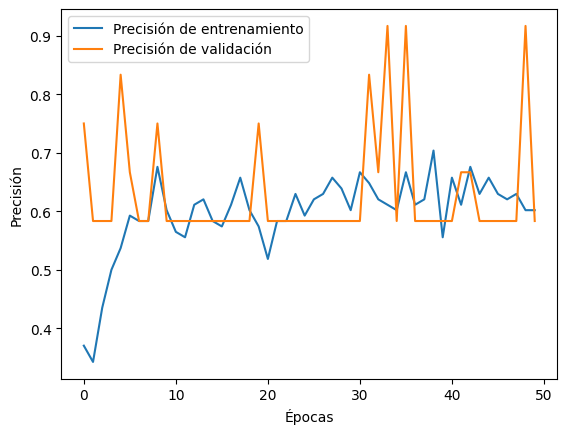

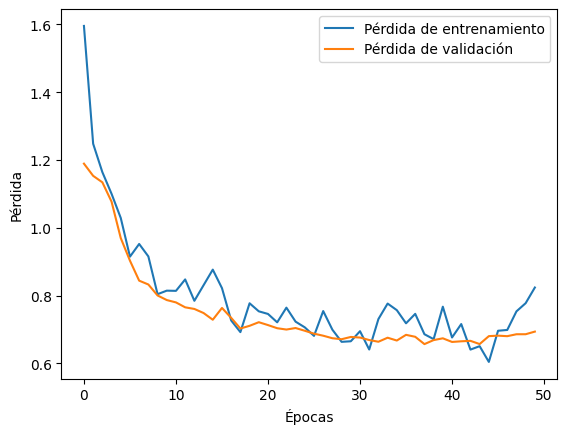

In [17]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

2. Cambie la tasa de aprendizaje a 0.0001:

In [18]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

optimizer = Adam(0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 1s 17ms/step - loss: 5.2741 - accuracy: 0.2870 - val_loss: 3.3941 - val_accuracy: 0.4167
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 5.2160 - accuracy: 0.3148 - val_loss: 3.3315 - val_accuracy: 0.4167
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 5.7415 - accuracy: 0.3241 - val_loss: 3.2571 - val_accuracy: 0.4167
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 4.6763 - accuracy: 0.3426 - val_loss: 3.2042 - val_accuracy: 0.4167
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 5.2925 - accuracy: 0.3333 - val_loss: 3.1482 - val_accuracy: 0.4167
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 4.9145 - accuracy: 0.3519 - val_loss: 3.0885 - val_accuracy: 0.4167
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 4.6693 - accuracy: 0.3611 - val_loss: 3.0336 - val_accuracy: 0.4167
Epoch 8/50
22/22 [=

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 47ms/step - loss: 1.8330 - accuracy: 0.3000
Precisión en el conjunto de prueba: 30.00%


In [20]:
model.save('mlp_model_dropout_desafio1_2.h5')

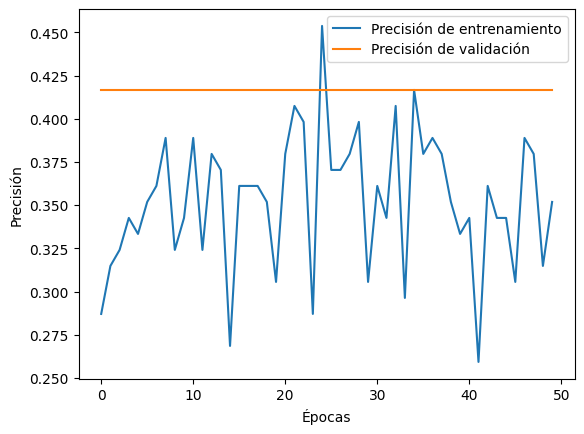

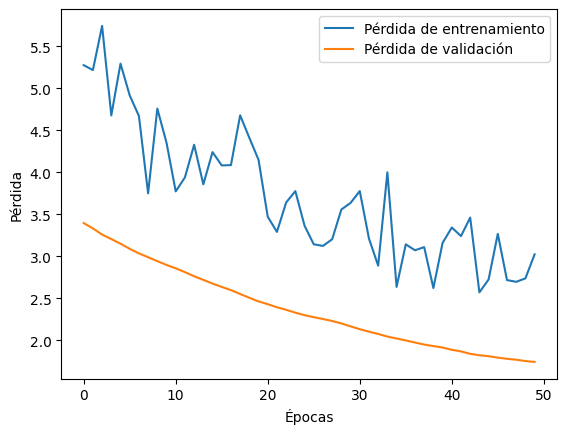

In [21]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Respuesta
### Al cambiar la tasa de aprendizaje a 0.01 en este caso logro reducir la predida y mejorar la precisión debido a que logra aprender de manera mas rapida que el modelo original, en cambio si reducimos la velocidad a la que aprende cambiando la tasa de aprendizaje a 0.0001 el modelo sufre una reduccion de la precisión y un aumento en la perdida para los hiperparametros iniciales.

### Desafío 2: Modificar el Número de Neuronas en las Capas Ocultas
1. Cambie el número de neuronas a 256 en cada capa oculta:

In [22]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 1s 18ms/step - loss: 5.8129 - accuracy: 0.3148 - val_loss: 4.7917 - val_accuracy: 0.5833
Epoch 2/50
22/22 [==============================] - 0s 6ms/step - loss: 4.5854 - accuracy: 0.5278 - val_loss: 3.9457 - val_accuracy: 1.0000
Epoch 3/50
22/22 [==============================] - 0s 6ms/step - loss: 3.8099 - accuracy: 0.6389 - val_loss: 3.4070 - val_accuracy: 0.6667
Epoch 4/50
22/22 [==============================] - 0s 6ms/step - loss: 3.4529 - accuracy: 0.6389 - val_loss: 3.1096 - val_accuracy: 0.5833
Epoch 5/50
22/22 [==============================] - 0s 6ms/step - loss: 3.0421 - accuracy: 0.6296 - val_loss: 2.8147 - val_accuracy: 0.6667
Epoch 6/50
22/22 [==============================] - 0s 6ms/step - loss: 2.7780 - accuracy: 0.6852 - val_loss: 2.5884 - val_accuracy: 0.9167
Epoch 7/50
22/22 [==============================] - 0s 6ms/step - loss: 2.5796 - accuracy: 0.7315 - val_loss: 2.3847 - val_accuracy: 1.0000
Epoch 8/50
22/22 [=

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 45ms/step - loss: 0.3676 - accuracy: 0.9667
Precisión en el conjunto de prueba: 96.67%


In [24]:
model.save('mlp_model_dropout_desafio2_1.h5')

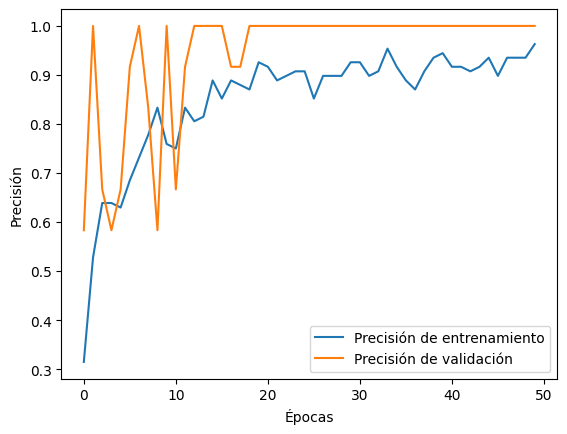

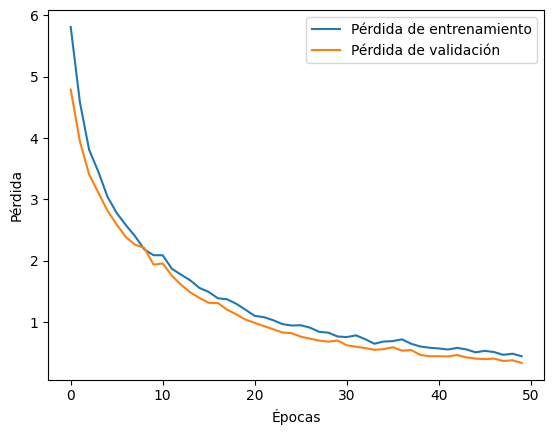

In [25]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

2. Cambie el número de neuronas a 1024 en cada capa oculta:

In [26]:
model = Sequential()
model.add(Dense(1024, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 1s 27ms/step - loss: 15.9339 - accuracy: 0.3889 - val_loss: 11.0110 - val_accuracy: 0.5833
Epoch 2/50
22/22 [==============================] - 0s 15ms/step - loss: 9.0223 - accuracy: 0.6481 - val_loss: 7.1020 - val_accuracy: 1.0000
Epoch 3/50
22/22 [==============================] - 0s 15ms/step - loss: 6.2441 - accuracy: 0.7963 - val_loss: 5.3887 - val_accuracy: 0.6667
Epoch 4/50
22/22 [==============================] - 0s 15ms/step - loss: 5.0095 - accuracy: 0.7407 - val_loss: 4.9770 - val_accuracy: 0.5833
Epoch 5/50
22/22 [==============================] - 0s 15ms/step - loss: 4.0578 - accuracy: 0.7963 - val_loss: 3.5034 - val_accuracy: 1.0000
Epoch 6/50
22/22 [==============================] - 0s 15ms/step - loss: 3.2475 - accuracy: 0.8611 - val_loss: 2.9034 - val_accuracy: 0.9167
Epoch 7/50
22/22 [==============================] - 0s 15ms/step - loss: 2.8075 - accuracy: 0.8148 - val_loss: 2.5739 - val_accuracy: 0.8333
Epoch 8/50


In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 48ms/step - loss: 0.2995 - accuracy: 0.9667
Precisión en el conjunto de prueba: 96.67%


In [28]:
model.save('mlp_model_dropout_desafio2_2.h5')

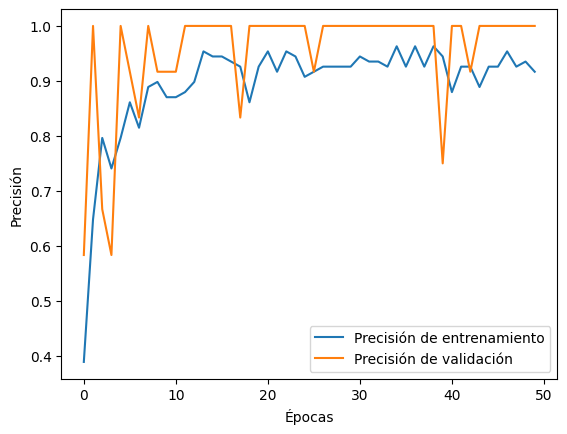

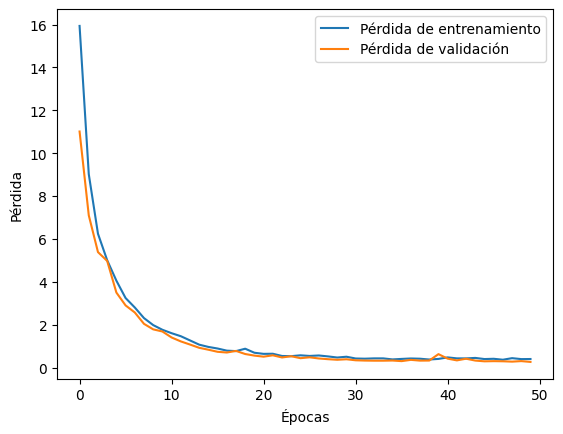

In [29]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Respuesta
### Se puede apreciar que al aumentar el numero de neuronas el modelo logra converger de manera efectiva aumentando en gran manera la precisión, ademas se puede apreciar que llegado cierto limite el aumento de neuronas deja de tener un efecto en la precisión ya que apenas hay alguna diferencia entre los dos aumentos realizados al numero de neuronas.

### Desafío 3: Cambiar la Cantidad de Épocas de Entrenamiento
1. Cambie el número de épocas a 10:

In [30]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_split=0.1)

Epoch 1/10
22/22 [==============================] - 1s 17ms/step - loss: 2.5882 - accuracy: 0.3148 - val_loss: 2.3215 - val_accuracy: 0.4167
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 2.8535 - accuracy: 0.3426 - val_loss: 1.9835 - val_accuracy: 0.4167
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 2.2033 - accuracy: 0.3611 - val_loss: 1.7364 - val_accuracy: 0.4167
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 2.0247 - accuracy: 0.3333 - val_loss: 1.5695 - val_accuracy: 0.4167
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 1.8994 - accuracy: 0.3056 - val_loss: 1.4557 - val_accuracy: 0.4167
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 1.6872 - accuracy: 0.3889 - val_loss: 1.3799 - val_accuracy: 0.4167
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 1.6845 - accuracy: 0.2593 - val_loss: 1.3187 - val_accuracy: 0.4167
Epoch 8/10
22/22 [=

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 50ms/step - loss: 1.2105 - accuracy: 0.4000
Precisión en el conjunto de prueba: 40.00%


In [32]:
model.save('mlp_model_dropout_desafio3_1.h5')

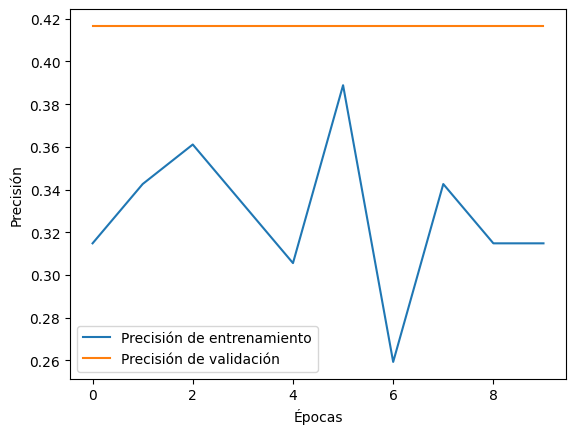

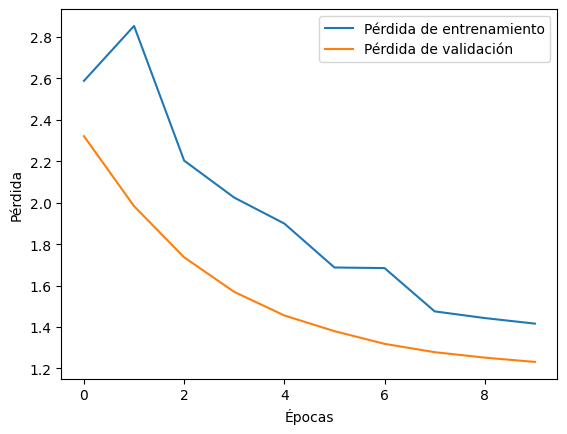

In [33]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

2. Cambie el número de épocas a 30:

In [34]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)

Epoch 1/30
22/22 [==============================] - 2s 30ms/step - loss: 2.1628 - accuracy: 0.3241 - val_loss: 1.7259 - val_accuracy: 0.4167
Epoch 2/30
22/22 [==============================] - 0s 5ms/step - loss: 2.3041 - accuracy: 0.3241 - val_loss: 1.5819 - val_accuracy: 0.4167
Epoch 3/30
22/22 [==============================] - 0s 5ms/step - loss: 1.8228 - accuracy: 0.3519 - val_loss: 1.4823 - val_accuracy: 0.5000
Epoch 4/30
22/22 [==============================] - 0s 5ms/step - loss: 1.6724 - accuracy: 0.3519 - val_loss: 1.4312 - val_accuracy: 0.5833
Epoch 5/30
22/22 [==============================] - 0s 5ms/step - loss: 1.7766 - accuracy: 0.3796 - val_loss: 1.3725 - val_accuracy: 0.5833
Epoch 6/30
22/22 [==============================] - 0s 5ms/step - loss: 1.8894 - accuracy: 0.3889 - val_loss: 1.3288 - val_accuracy: 0.0833
Epoch 7/30
22/22 [==============================] - 0s 5ms/step - loss: 1.7641 - accuracy: 0.2778 - val_loss: 1.2988 - val_accuracy: 0.0000e+00
Epoch 8/30
22/2

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 47ms/step - loss: 1.2235 - accuracy: 0.3000
Precisión en el conjunto de prueba: 30.00%


In [36]:
model.save('mlp_model_dropout_desafio3_2.h5')

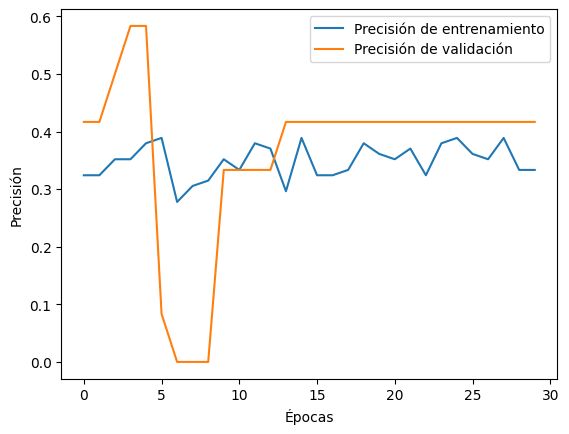

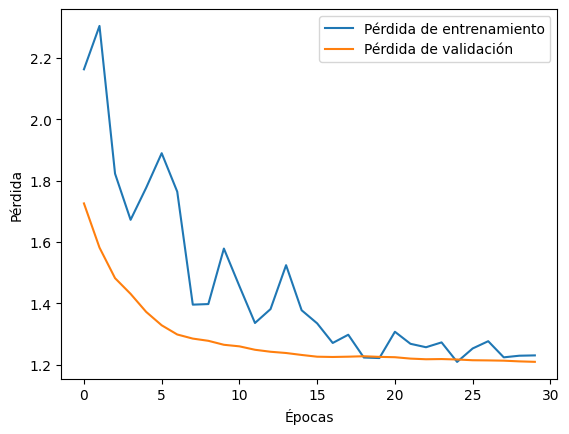

In [37]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Respuesta
### En los dos casos al reducir el numero de epocas, se reduce el tiempo para entrenar al modelo lo que reduce la precisión en comparación con el modelo original, en el caso de 10 epocas tiene mayor perdida que el de 30 epocas pero no tiene mayor impacto en la precisión.

### Desafío 4: Modificar la Función de Activación en las Capas Ocultas
1. Cambie la función de activación a `sigmoid`:

In [38]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 1s 17ms/step - loss: 1.4471 - accuracy: 0.3519 - val_loss: 1.4615 - val_accuracy: 0.4167
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 1.5314 - accuracy: 0.3333 - val_loss: 1.4198 - val_accuracy: 0.4167
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 1.3870 - accuracy: 0.4074 - val_loss: 1.3929 - val_accuracy: 0.4167
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 1.4837 - accuracy: 0.2963 - val_loss: 1.3653 - val_accuracy: 0.4167
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 1.4322 - accuracy: 0.2870 - val_loss: 1.3346 - val_accuracy: 0.4167
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 1.3717 - accuracy: 0.3148 - val_loss: 1.3165 - val_accuracy: 0.4167
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 1.2868 - accuracy: 0.3981 - val_loss: 1.2992 - val_accuracy: 0.4167
Epoch 8/50
22/22 [=

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 45ms/step - loss: 1.1174 - accuracy: 0.3333
Precisión en el conjunto de prueba: 33.33%


In [40]:
model.save('mlp_model_dropout_desafio4_1.h5')

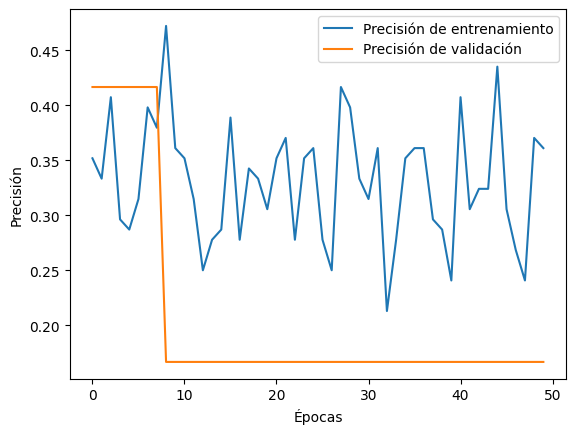

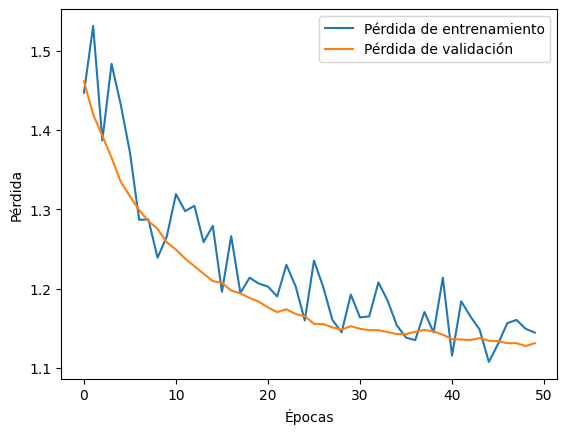

In [41]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

2. Cambie la función de activación a `tanh`:

In [42]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 1s 17ms/step - loss: 1.4934 - accuracy: 0.3426 - val_loss: 1.4115 - val_accuracy: 0.1667
Epoch 2/50
22/22 [==============================] - 0s 6ms/step - loss: 1.5117 - accuracy: 0.3796 - val_loss: 1.3569 - val_accuracy: 0.1667
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 1.5049 - accuracy: 0.3981 - val_loss: 1.3231 - val_accuracy: 0.1667
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 1.4473 - accuracy: 0.3519 - val_loss: 1.2919 - val_accuracy: 0.3333
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 1.5090 - accuracy: 0.3611 - val_loss: 1.2662 - val_accuracy: 0.5833
Epoch 6/50
22/22 [==============================] - 0s 6ms/step - loss: 1.4405 - accuracy: 0.3611 - val_loss: 1.2323 - val_accuracy: 0.6667
Epoch 7/50
22/22 [==============================] - 0s 6ms/step - loss: 1.4905 - accuracy: 0.3426 - val_loss: 1.2169 - val_accuracy: 0.6667
Epoch 8/50
22/22 [=

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 46ms/step - loss: 0.5528 - accuracy: 0.9000
Precisión en el conjunto de prueba: 90.00%


In [44]:
model.save('mlp_model_dropout_desafio4_2.h5')

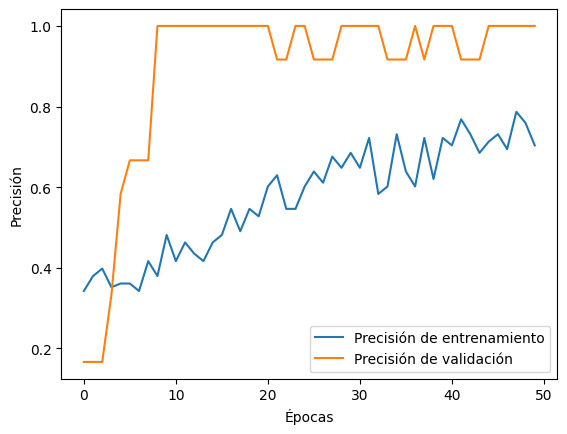

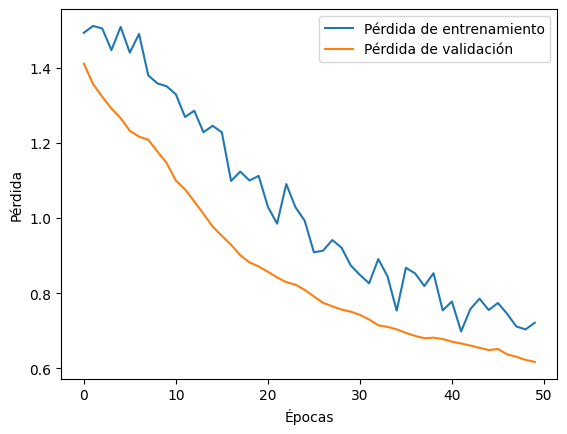

In [45]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Respuesta
### Segun lo visto, para este problema serviria cambiar la funcion de activación a la funcion "tanh" ya que con los mismo hiperparametros del modelo original logra subir la precisión de manera substancial, en el caso de la funcion de activación "sigmoid" para este problema no logro converger de manera efectiva.